# Sampled video EDA
Just a short notebook to get a few insights into how the video database looks. 
Main objective is to get a feeling for the distribution of the views, likes and dislikes and how they correlate. 


In [1]:
# Imports
import matplotlib.pyplot as plt
import seaborn as sns
import fabulus

import pandas as pd
import src.eda.eda_util as eda_util
from src.preprocessing.indexer import Indexer

import os
%pwd
%matplotlib inline

In [2]:
WDIR = 'H:\\Workspaces\\Projects\\PR_data_science\\src\\eda'
os.chdir(WDIR+'\\..\\..')
os.getcwd()

'H:\\Workspaces\\Projects\\PR_data_science'

In [3]:
# Fetch the data
X_train, X_test, y_train, y_test = Indexer.load_split('cache/tts_42')
df = X_train.append(X_test)
y = y_train.append(y_test)
df = eda_util.get_metaframe(df)
df.rename(columns={0: 'v_id', 1: 'n_samples'}, inplace=True)  # Backwards compatibility
df['viewcounts'] = y

## General Overview

In [4]:
df.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
912,cWGE9Gi0bB0,30,Shine On You Crazy Diamond Pt.2,Pink Floyd,303592.0,16612.0,802.0,4.792482,56844829
594,DumlIIHSrsQ,30,American Dream,Casting Crowns,8557.0,226.0,248.0,4.897074,2645372
564,qdOHPjMzY8s,30,The Boy With The Thorn In His Side,The Smiths,41534.0,850.0,185.0,4.919781,7154588
1822,5lVatZeQ68Y,30,Animals,Muse,1188.0,45.0,263.0,4.854014,175854
2019,S4ZWD_0VRK8,30,Wild World,Maxi Priest,53718.0,1992.0,215.0,4.856974,10029369


In [5]:
df.describe()


,n_samples,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
count,3871.0,3.849000e+03,3.849000e+03,3871.000000,3871.000000,3.871000e+03
mean,30.0,3.016534e+05,1.297487e+04,253.541720,4.880807,6.153432e+07
std,0.0,8.498919e+05,5.817202e+04,118.489541,0.109742,1.838643e+08
min,30.0,1.000000e+00,0.000000e+00,40.000000,2.934525,2.100000e+01
25%,30.0,2.543000e+03,5.800000e+01,209.000000,4.866445,3.467615e+05
50%,30.0,2.723400e+04,6.430000e+02,238.000000,4.902820,4.789629e+06
75%,30.0,1.879370e+05,5.218000e+03,276.000000,4.927784,3.526810e+07
max,30.0,1.152428e+07,1.555113e+06,4478.000000,5.000000,2.953195e+09


## Viewcounts

Text(0, 0.5, 'videos (log)')

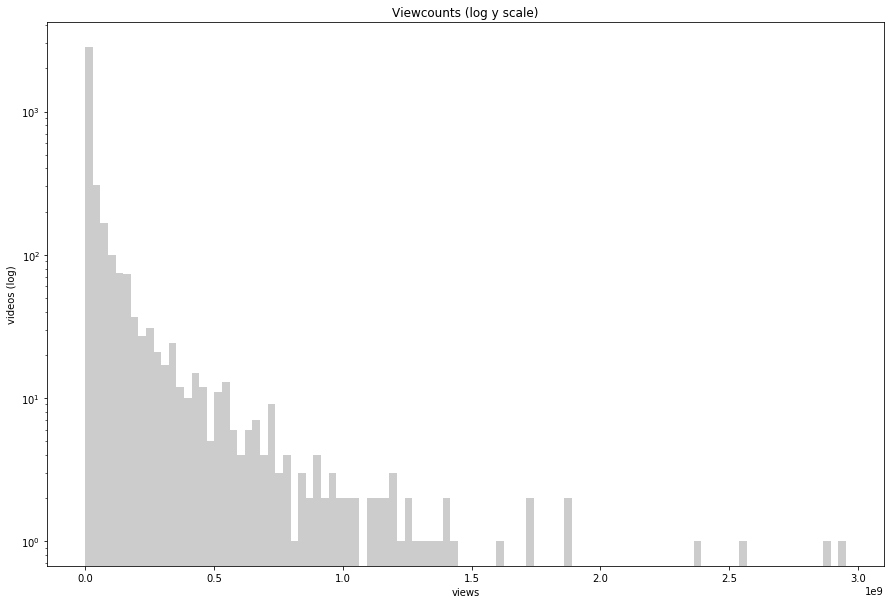

In [17]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set(yscale='log')
sns.distplot(df['viewcounts'].to_numpy(), bins=100, color='grey', kde=False)
plt.title('Viewcounts (log y scale)')
plt.xlabel('views')
plt.ylabel('videos (log)')

#### Least viewed

In [9]:
sorted_views = df.sort_values(by=['viewcounts'], ascending=True)
sorted_views.head()

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
45,-FeCW1JfnCE,30,Future Past,Geneva Jacuzzi,4.0,0.0,82.0,5.0,21
1174,7SgI_9u9A9c,30,В наших глазах,Кино,4.0,0.0,172.0,5.0,42
995,EGGbzLspma4,30,His Name Is Mutty Ranks,A Tribe Called Quest,1.0,0.0,116.0,5.0,85
3331,_Djika1NFco,30,Into Extremes,Clan of Xymox,1.0,0.0,342.0,5.0,131
418,TJEhsSNeTvM,30,Dancing With a Ghost,Valencia,2.0,0.0,212.0,5.0,137


#### Most viewed

In [11]:
sorted_views.tail()[::-1]

,v_id,n_samples,song_name,creator,v_likes,v_dislikes,v_duration,v_avg_rating,viewcounts
1224,CevxZvSJLk8,30,Roar,Katy Perry,10337849.0,834301.0,269.0,4.701293,2953194541
2611,lp-EO5I60KA,30,Thinking Out Loud,Ed Sheeran,10733276.0,480611.0,297.0,4.828566,2878210876
719,RBumgq5yVrA,30,Let Her Go,Passenger,9722598.0,325193.0,254.0,4.870542,2546728867
2627,pRpeEdMmmQ0,30,Waka Waka (This Time for Africa),Shakira,9818249.0,641884.0,211.0,4.754541,2391814721
373,uelHwf8o7_U,30,Love The Way You Lie,Eminem,8192551.0,307195.0,267.0,4.855434,1884840765


## Likes

h:\anwendungen\python\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
h:\anwendungen\python\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'videos (log)')

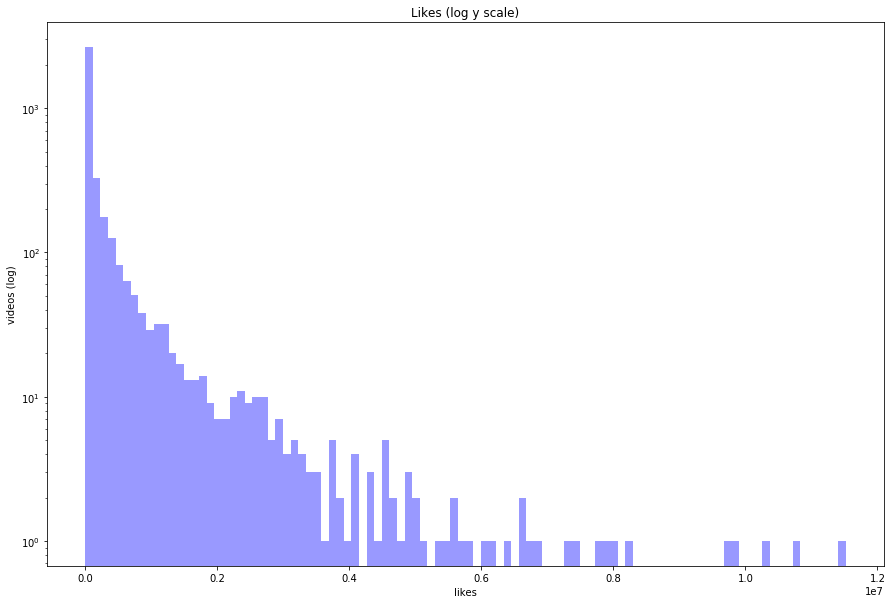

In [14]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set(yscale='log')
sns.distplot(df['v_likes'].to_numpy(), bins=100, color='green', kde=False)
plt.title('Likes (log y scale)')
plt.xlabel('likes')
plt.ylabel('videos (log)')

## Dislikes

h:\anwendungen\python\lib\site-packages\numpy\lib\histograms.py:829: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
h:\anwendungen\python\lib\site-packages\numpy\lib\histograms.py:830: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0, 0.5, 'videos (log)')

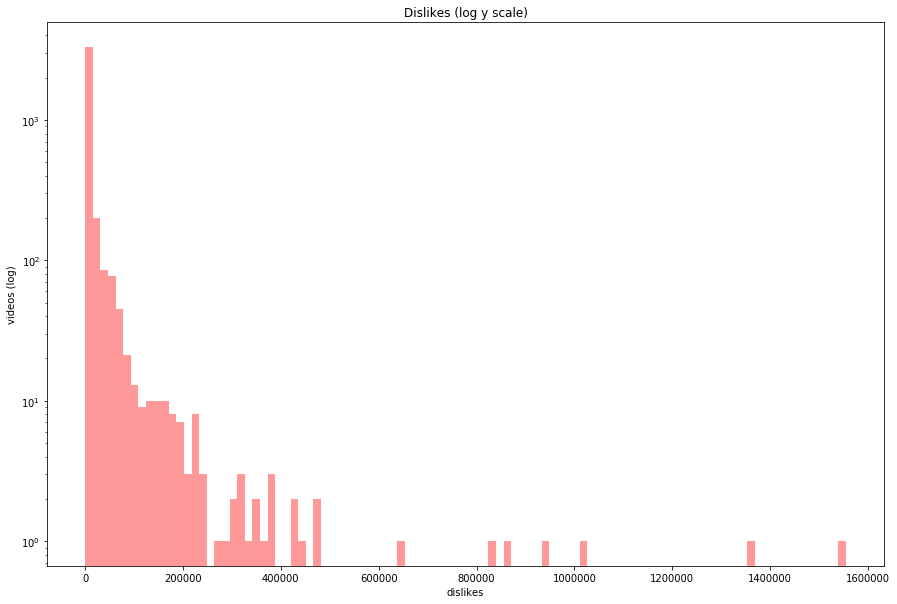

In [18]:
fig, ax = plt.subplots(figsize=(15,10))
ax.set(yscale='log')
sns.distplot(df['v_dislikes'].to_numpy(), bins=100, color='red', kde=False)
plt.title('Dislikes (log y scale)')
plt.xlabel('dislikes')
plt.ylabel('videos (log)')

## Average Rating

## Connections

## Conclusion




